# Classificação com Decision Trees
## ELE606 - Tópicos Especiais em Inteligência Artificial

> Aluno: [Pedro Artur Varela](https://github.com/pedro-varela1)

<img src="https://i1.wp.com/cloudmark.github.io/images/kotlin/ID3.png"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>
  
![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

## Introdução

Árvores de Decisão (DTs) são um método de aprendizagem supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de um variável alvo aprendendo regras de decisão simples inferidas a partir dos dados Características. Uma árvore pode ser vista como uma aproximação constante por partes.

---

## Algoritmo e código

### Pré-processamento dos dados

Primeiramente, vamos importar os módulos utilizados.

In [15]:
!pip install tensorflow_decision_forests

In [16]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf   # Modelos de IA e trabalho com tensores
import tensorflow_decision_forests as tfdf    # Modelo Florestas de Decisão - Árvores de Decisão
import pandas as pd   # Manipulação dos dados
import seaborn as sns   # Visualização
import matplotlib.pyplot as plt   # Visualização
import numpy as np    # Manipulação Numérica
from sklearn.datasets import load_wine    # Carregar dataset

Vamos carregar a base de dados na configuração desejada (esse passo realizamos na atividade anterior).

In [17]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
heart_df = pd.read_csv('../input/heart-disease-dataset/heart.csv')
heart_df.head()

/kaggle/input/heart-disease-dataset/heart.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Vamos carregar a base de dados na configuração desejada (esse passo realizamos na atividade anterior).

In [18]:
heart_df.info()  # Informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [19]:
heart_df.describe() # Descricao

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


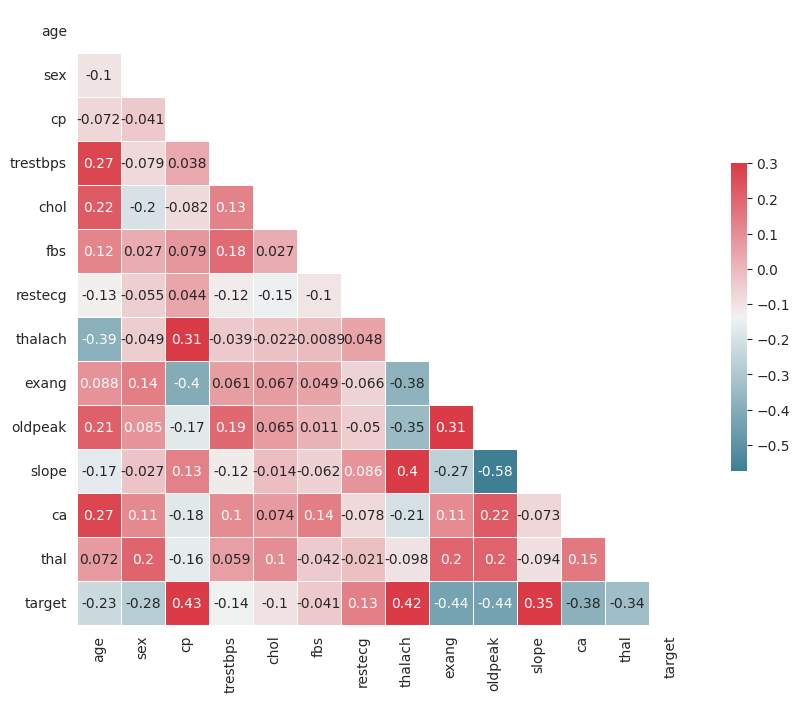

In [20]:
# Ver mapa de calor mostrando a correlação entre as variáveis

corr = heart_df.corr()   # Retirar correlação

# Gerar máscara para o gráfico - será triangular
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Gerar um colormap diversificado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Gerar a figura com o matplotlib
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Vemos que a correlação de _chol_ e _fbs_ com o _target_ é muito pequena, vamos retirar essa coluna da análise.

In [21]:
heart_df.drop(['chol', 'fbs'], axis = 1, inplace = True)
heart_df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,1,168,0,1.0,2,2,3,0
1,53,1,0,140,0,155,1,3.1,0,0,3,0
2,70,1,0,145,1,125,1,2.6,0,0,3,0
3,61,1,0,148,1,161,0,0.0,2,1,3,0
4,62,0,0,138,1,106,0,1.9,1,3,2,0


Vamos separar os dados de treinamento e os dados de teste.

In [22]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(heart_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

722 examples in training, 303 examples in testing.


Agora, para manipular o modelo com o Tensorflow, é necessário converter os dados de pandas dataframe para tensor.

In [23]:
label = 'target'

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)

valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

Vamos construir o modelo da Floresta de Decisão, com os parâmetros padrão do Tensorflow..

In [24]:
rf = tfdf.keras.RandomForestModel(num_trees=200)
rf.compile(metrics=["accuracy", "mse"])

Use /tmp/tmp8khcinbr as temporary training directory


### Treinamento do Modelo

O modelo já está projeto, agora basta treiná-lo.

In [25]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.252451. Found 722 examples.
Training model...
Model trained in 0:00:00.186143
Compiling model...


[INFO 23-10-02 12:56:02.7365 UTC kernel.cc:1243] Loading model from path /tmp/tmp8khcinbr/model/ with prefix 6a9ce17981e145b2
[INFO 23-10-02 12:56:02.8033 UTC decision_forest.cc:660] Model loaded with 200 root(s), 17056 node(s), and 11 input feature(s).
[INFO 23-10-02 12:56:02.8034 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-10-02 12:56:02.8034 UTC kernel.cc:1075] Use fast generic engine


Model compiled.


Vamos ver o formato da árvore de decisão de índice 0.

In [26]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

### Análise dos Resultados

Vamos analisar os resultados através do gráfico da acurácia pelo número de árvores.

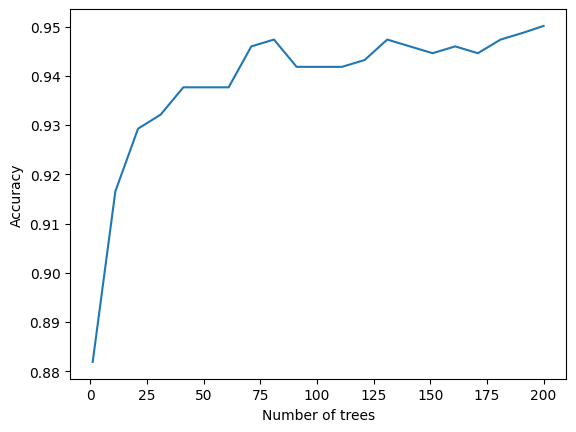

In [27]:
logs = rf.make_inspector().training_logs()

plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

Vamos ter uma visão geral da acurácia final.

In [28]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 170ms/step - loss: 0.0000e+00 - accuracy: 0.9703 - mse: 0.0393
loss: 0.0000
accuracy: 0.9703
mse: 0.0393
